<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
train_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Test.csv'

In [3]:
columns = ['duration','protocol_type','service','flag','src_bytes',
    'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
    'logged_in','num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','class_label']


df = pd.read_csv(train_url, names = columns)

df_test = pd.read_csv(test_url, names = columns)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


## 데이터 전처리

In [6]:
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [7]:
df_test['protocol_type'].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [8]:
for columns in df.columns:
  if df[columns].dtypes == 'object':
    print(columns, '\n종류:', df[columns].unique(), '\n개수:', df[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 
개수: 70 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 
개수: 11 

class_label 
종류: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'

In [9]:
for columns in df_test.columns:
  if df_test[columns].dtypes == 'object':
    print(columns, '\n종류:', df_test[columns].unique(), '\n개수:', df_test[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'icmp' 'udp'] 
개수: 3 

service 
종류: ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u'] 
개수: 64 

flag 
종류: ['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH'] 
개수: 11 

class_label 
종류: ['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'load

In [10]:
df_object = df[['protocol_type','service','flag']]
df_object.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [11]:
from sklearn.preprocessing import MinMaxScaler

df_dumm = pd.get_dummies(df, columns=['protocol_type','service','flag'])

df_fi = df_dumm.drop(columns=['class_label'])
df_cl = df_dumm['class_label']

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(df_fi)

df_fi = pd.DataFrame(np_scaled, columns = df_fi.columns)

df_fi

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_test_dumm = pd.get_dummies(df_test, columns=['protocol_type','service','flag'])

df_test_fi = df_test_dumm.drop(columns=['class_label'])
df_test_cl = df_test_dumm['class_label']

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(df_test_fi)

df_test_fi = pd.DataFrame(np_scaled, columns = df_test_fi.columns)

df_test_fi

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
print(df_fi.shape, df_cl.shape)
print(df_test_fi.shape, df_test_cl.shape)

(125973, 122) (125973,)
(22544, 116) (22544,)


In [14]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(df_fi, df_cl)

y_preds = xgb.predict(df_test_fi) 

print('Accuracy: %.2f' % accuracy_score(df_test_cl, y_preds))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(df_fi, df_cl)\n\ny_preds = xgb.predict(df_test_fi) \n\nprint('Accuracy: %.2f' % accuracy_score(df_test_cl, y_preds))"

test셋에는 없는 컬럼 찾기

In [15]:
diff = df_fi.columns.difference(df_test_fi.columns)
diff

Index(['service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_red_i', 'service_urh_i'],
      dtype='object')

test셋 컬럼 추가

In [16]:
df_test_fi[diff] = np.nan
df_test_fi

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_aol,service_harvest,service_http_2784,service_http_8001,service_red_i,service_urh_i
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


결측값 0으로 대체

In [17]:
fidf_test = df_test_fi.fillna(0)
fidf_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_aol,service_harvest,service_http_2784,service_http_8001,service_red_i,service_urh_i
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
fidf = df_fi 
fidf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
fidfcl = df_cl
fidfcl_test = df_test_cl 

print(fidf.shape, fidfcl.shape)
print(fidf_test.shape, fidfcl_test.shape)

(125973, 122) (125973,)
(22544, 122) (22544,)


In [20]:
fidfcl

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class_label, Length: 125973, dtype: object

공격유형 지정

In [21]:
dfdos = fidfcl.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 'dos')
dfr2l = dfdos.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 'r2l')
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 'u2r')
dfprobe = dfu2r.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'probe')
fidflabel = dfprobe
fidflabel.value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: class_label, dtype: int64

In [22]:
dfdos_test = fidfcl_test.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 'dos')
dfr2l_test = dfdos_test.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 'r2l')
dfu2r_test = dfr2l_test.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 'u2r')
dfprobe_test = dfu2r_test.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'probe')
fidflabel_test = dfprobe_test
fidflabel_test.value_counts()

normal    9711
dos       7458
r2l       2887
probe     2421
u2r         67
Name: class_label, dtype: int64

In [23]:
print(fidf.shape, fidflabel.shape)
print(fidf_test.shape, fidflabel_test.shape)

(125973, 122) (125973,)
(22544, 122) (22544,)


In [24]:
x = fidf
y = fidflabel

x_test = fidf_test
y_test = fidflabel_test
print(x.shape, y.shape)
print(x_test.shape, y_test.shape)

(125973, 122) (125973,)
(22544, 122) (22544,)


In [25]:
y.value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: class_label, dtype: int64

In [26]:
y_test.value_counts()

normal    9711
dos       7458
r2l       2887
probe     2421
u2r         67
Name: class_label, dtype: int64

# XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x.values, y.values)

ytest_preds = xgb.predict(x_test.values)


print('Accuracy: %.2f' % accuracy_score(y_test.values, ytest_preds))

'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(fidf.values, fidflabel.values)

ytest_preds = xgb.predict(fidf_test.values)

print('Accuracy: %.2f' % accuracy_score(fidflabel_test.values, ytest_preds))'''

Accuracy: 0.74


"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(fidf.values, fidflabel.values)\n\nytest_preds = xgb.predict(fidf_test.values)\n\n\nprint('Accuracy: %.2f' % accuracy_score(fidflabel_test.values, ytest_preds))"

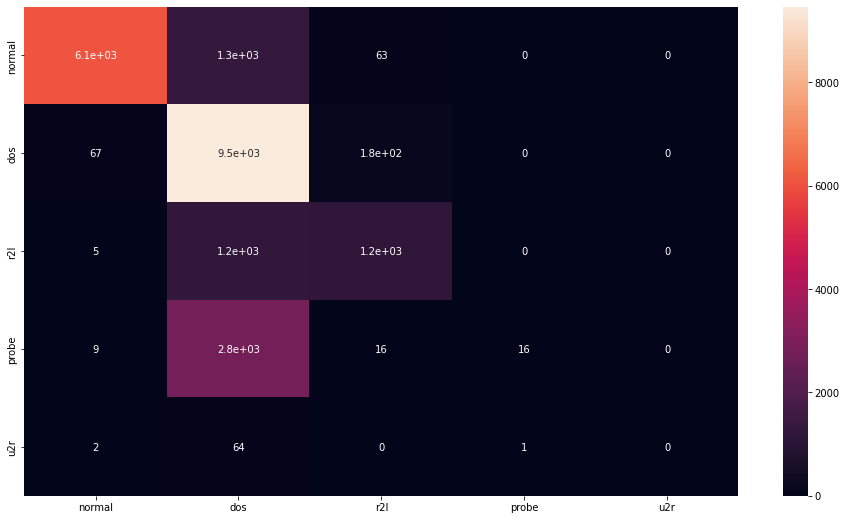

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, ytest_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True, 
    xticklabels=['normal', 'dos', 'r2l', 'probe', 'u2r'],
    yticklabels=['normal', 'dos', 'r2l', 'probe', 'u2r']
)
plt.show()

In [28]:
for feature, importance in zip(x_test.columns, xgb.feature_importances_):
  print('%s: %.2f' % (feature, importance))

duration: 0.00
src_bytes: 0.03
dst_bytes: 0.01
land: 0.00
wrong_fragment: 0.02
urgent: 0.00
hot: 0.01
num_failed_logins: 0.01
logged_in: 0.00
num_compromised: 0.01
root_shell: 0.00
su_attempted: 0.00
num_root: 0.00
num_file_creations: 0.00
num_shells: 0.00
num_access_files: 0.00
num_outbound_cmds: 0.00
is_host_login: 0.00
is_guest_login: 0.01
count: 0.03
srv_count: 0.00
serror_rate: 0.01
srv_serror_rate: 0.00
rerror_rate: 0.00
srv_rerror_rate: 0.00
same_srv_rate: 0.49
diff_srv_rate: 0.06
srv_diff_host_rate: 0.00
dst_host_count: 0.00
dst_host_srv_count: 0.00
dst_host_same_srv_rate: 0.00
dst_host_diff_srv_rate: 0.02
dst_host_same_src_port_rate: 0.02
dst_host_srv_diff_host_rate: 0.00
dst_host_serror_rate: 0.01
dst_host_srv_serror_rate: 0.00
dst_host_rerror_rate: 0.00
dst_host_srv_rerror_rate: 0.00
protocol_type_icmp: 0.00
protocol_type_tcp: 0.00
protocol_type_udp: 0.00
service_IRC: 0.00
service_X11: 0.00
service_Z39_50: 0.00
service_auth: 0.00
service_bgp: 0.00
service_courier: 0.00
servi

In [30]:
pip install eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [32]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(x_test.values, y_test.values)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0543 ± 0.0020,src_bytes
0.0253 ± 0.0009,dst_host_rerror_rate
0.0148 ± 0.0003,diff_srv_rate
0.0105 ± 0.0009,count
0.0105 ± 0.0015,dst_host_same_srv_rate
0.0072 ± 0.0006,protocol_type_icmp
0.0063 ± 0.0007,dst_bytes
0.0056 ± 0.0006,dst_host_srv_diff_host_rate
0.0047 ± 0.0003,dst_host_serror_rate
0.0042 ± 0.0006,srv_count
